<a href="https://colab.research.google.com/github/Jasmine-kaur8/Micro-Credit-Project/blob/main/Micro_Credit_Loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving micro credit loan data.xlsx to micro credit loan data.xlsx


In [ ]:
#Imprting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_excel('micro credit loan data.xlsx')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [ ]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [ ]:
data.isna().sum().any()

False

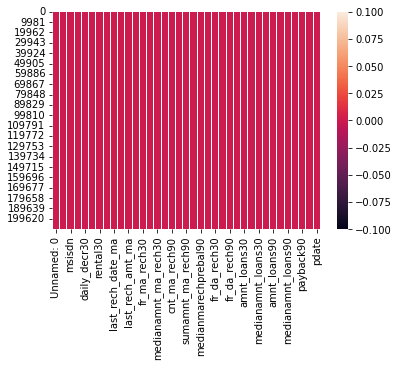

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

In [ ]:
#Feature Engineering on data

data['pdate'] = data['pdate'].astype(str)
data['date']  = data['pdate'].str.split('-').str[2]
data['month'] = data['pdate'].str.split('-').str[1]
data['year']  = data['pdate'].str.split('-').str[0]
data.drop(columns = 'pdate', axis = 1, inplace = True)


data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,date,month,year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,07,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,08,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,08,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06,06,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,06,2016


In [ ]:
data.drop(columns = 'Unnamed: 0',axis = 1, inplace = True)


In [ ]:
y = data['label'].value_counts()
y

1    183431
0     26162
Name: label, dtype: int64

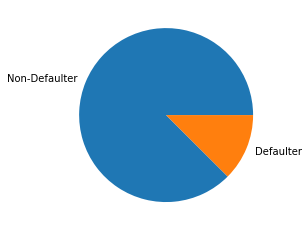

In [ ]:
labels = ["Non-Defaulter","Defaulter"]

plt.pie(y, labels = labels)
plt.show()

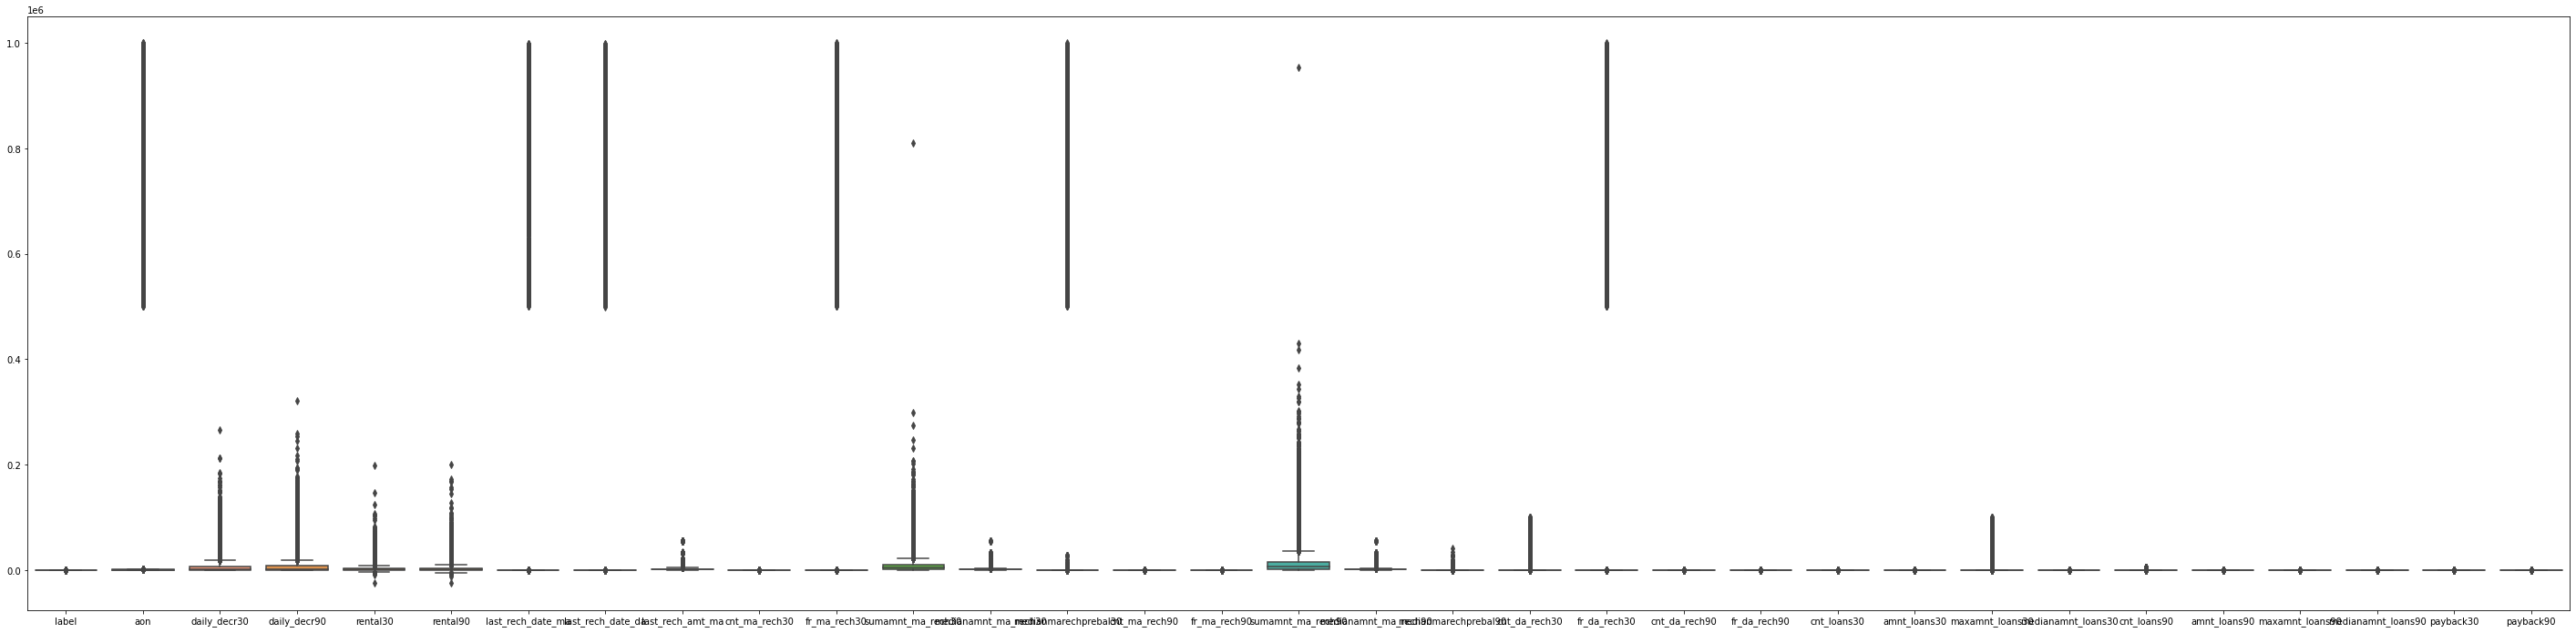

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(50, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46657e8c50>,
      dtype=object)

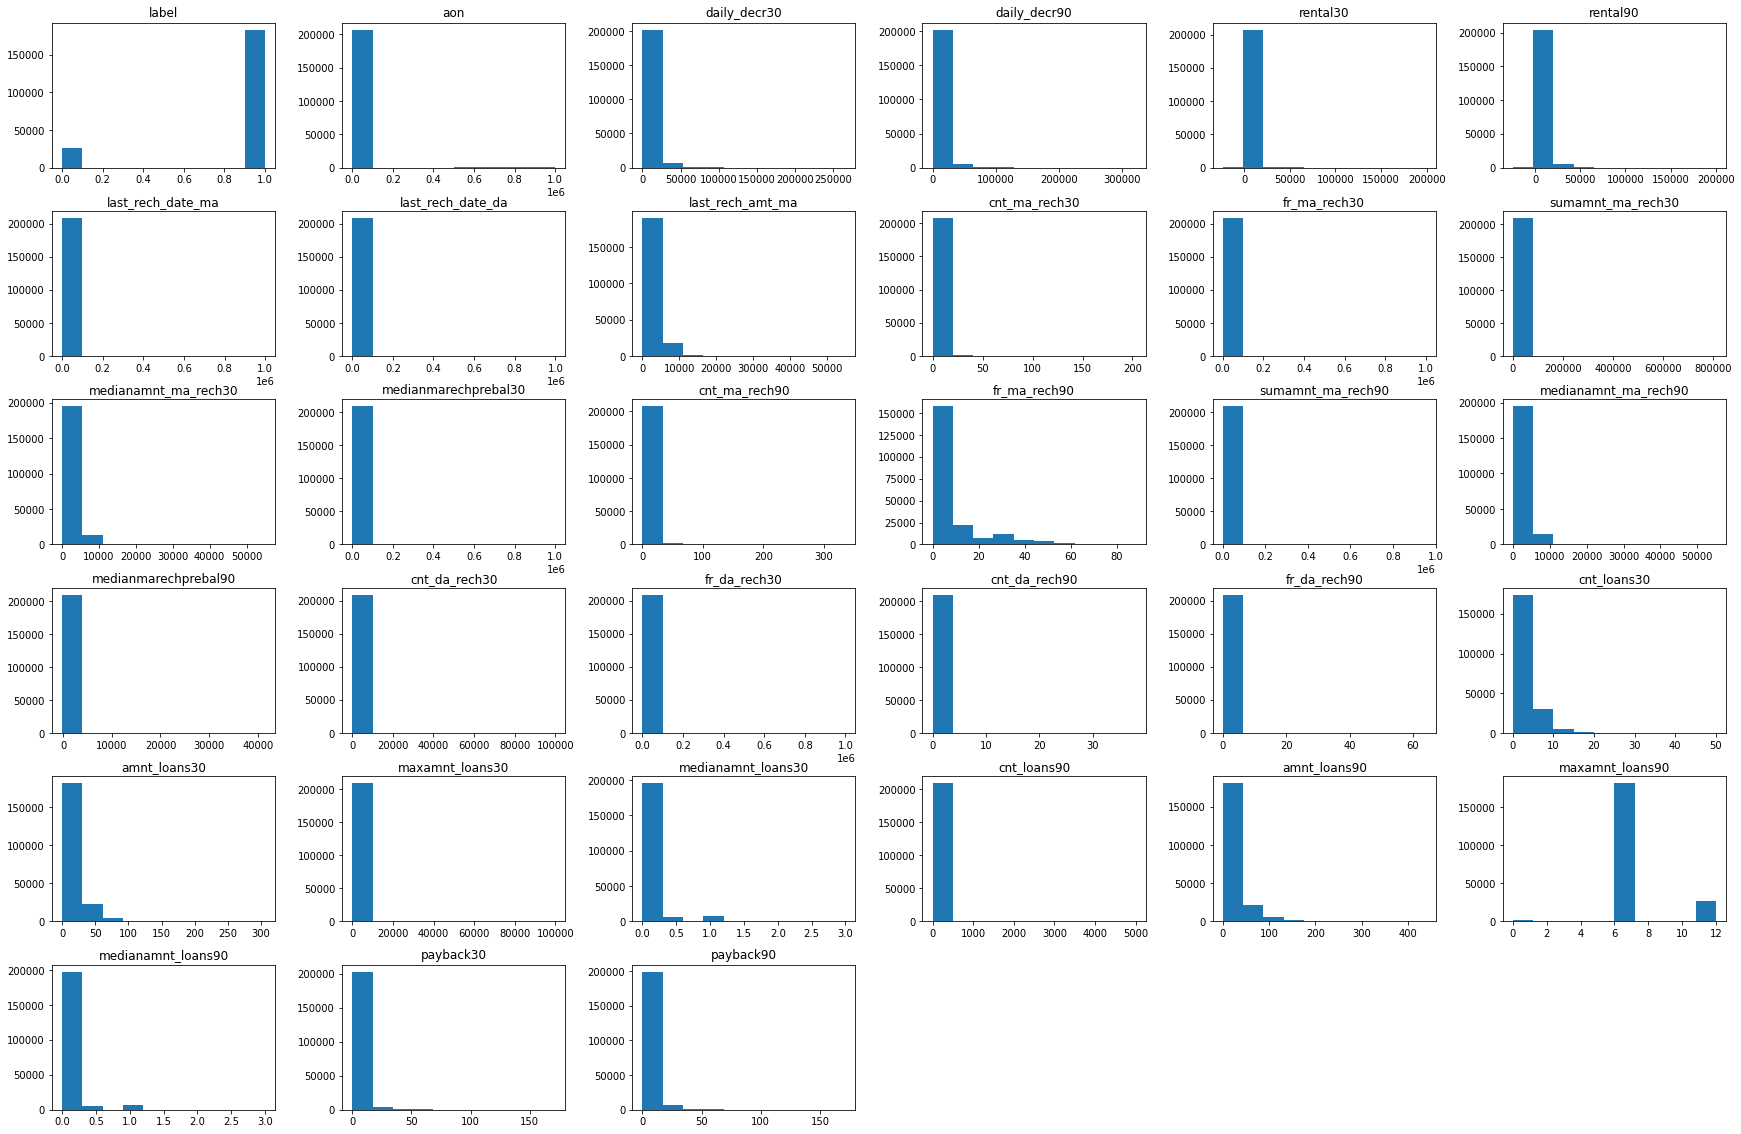

In [ ]:
data.hist(figsize = (30,20), grid = False)

In [ ]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


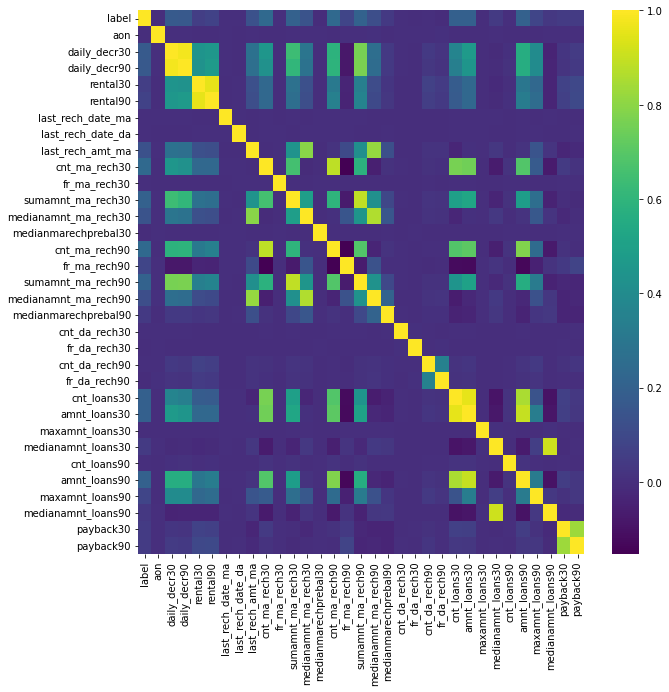

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='viridis')

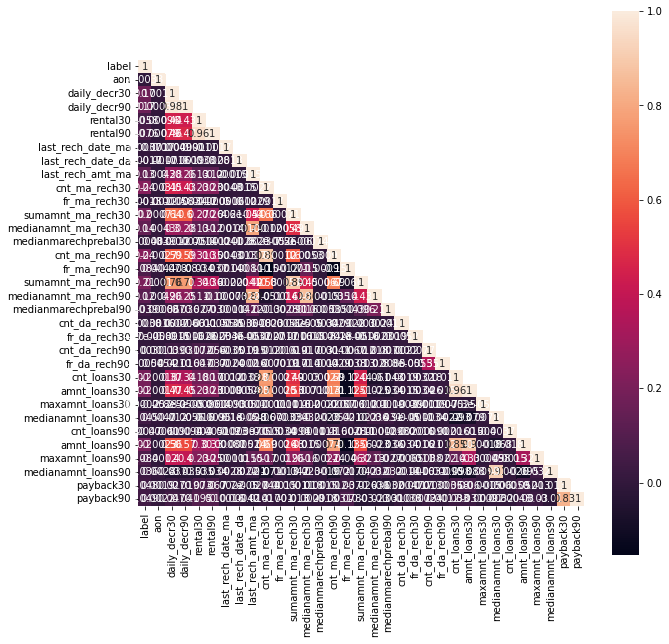

In [ ]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

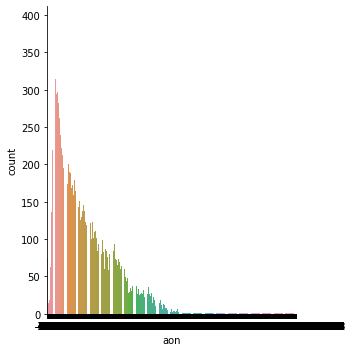

In [ ]:
#Age on cellular network

sns.factorplot('aon',data = data,kind='count')

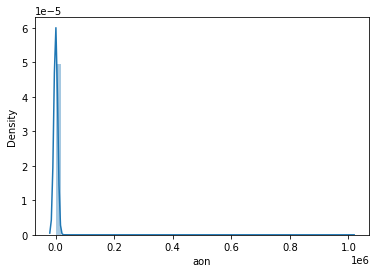

In [ ]:
#Age on cellular network

sns.distplot(data.aon)

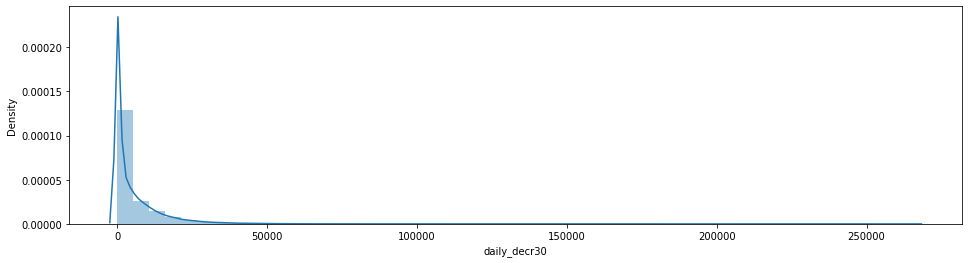

In [ ]:
#daily_decr30

plt.figure(figsize=(16,4))
sns.distplot(data.daily_decr30)

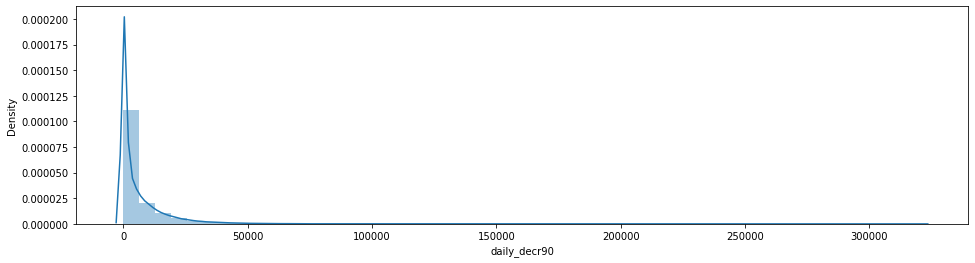

In [ ]:
#daily_decr90

plt.figure(figsize=(16,4))
sns.distplot(data.daily_decr90)

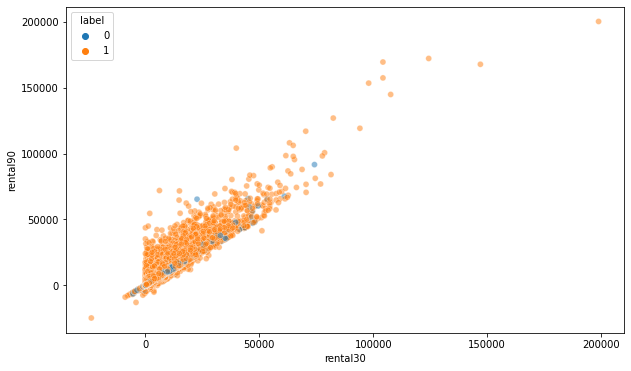

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.rental30,data.rental90,hue=data.label,alpha=0.5)

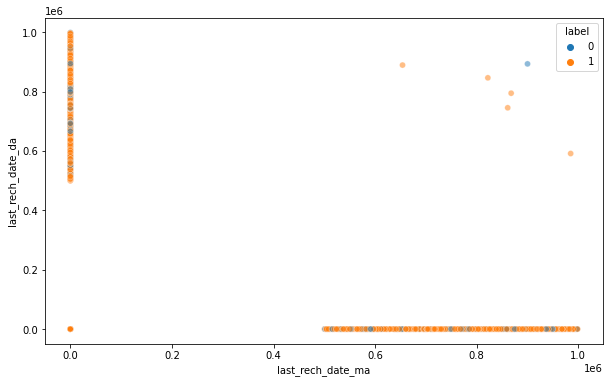

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.last_rech_date_ma,data.last_rech_date_da,hue=data.label,alpha=0.5)


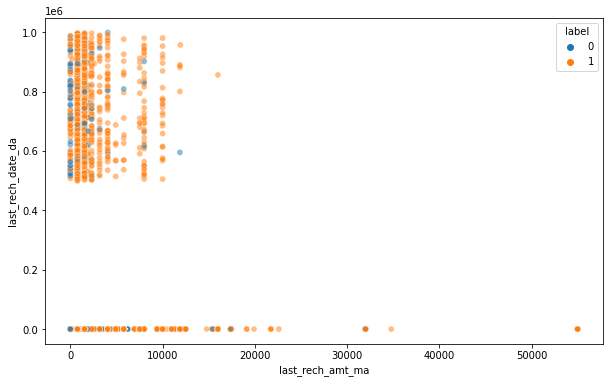

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.last_rech_amt_ma,data.last_rech_date_da,hue=data.label,alpha=0.5)


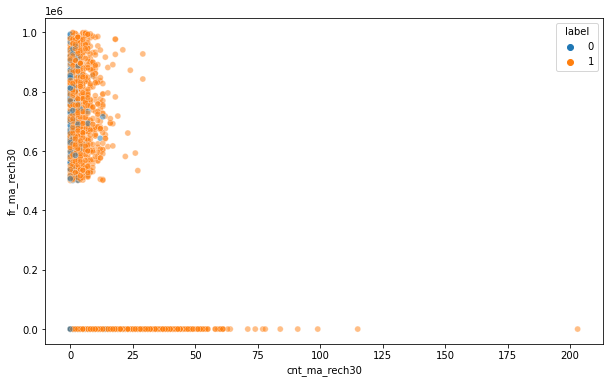

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.cnt_ma_rech30,data.fr_ma_rech30,hue=data.label,alpha=0.5)



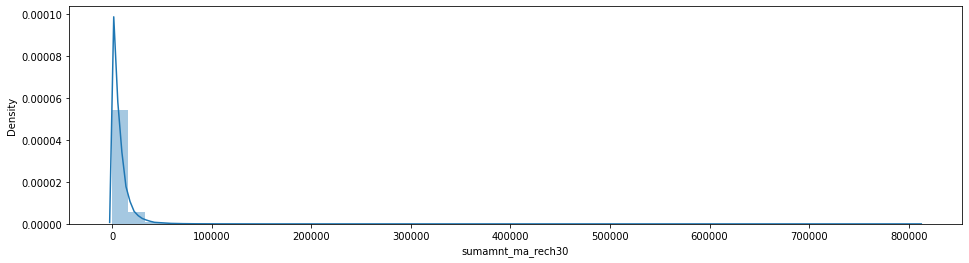

In [ ]:
plt.figure(figsize=(16,4))
sns.distplot(data.sumamnt_ma_rech30)

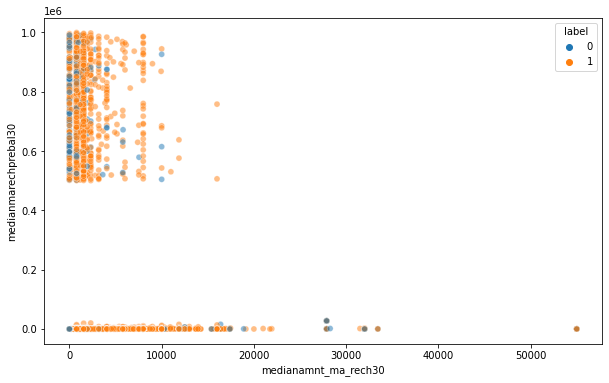

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.medianamnt_ma_rech30,data.medianmarechprebal30,hue=data.label,alpha=0.5)

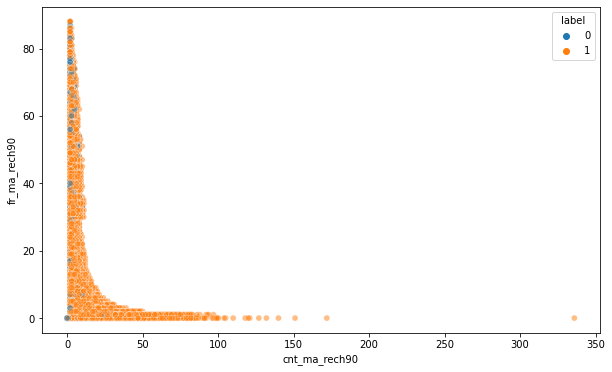

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.cnt_ma_rech90,data.fr_ma_rech90,hue=data.label,alpha=0.5)


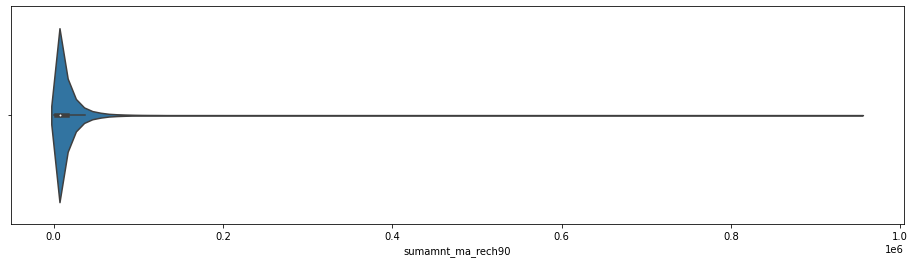

In [ ]:
plt.figure(figsize=(16,4))
sns.violinplot(data.sumamnt_ma_rech90)

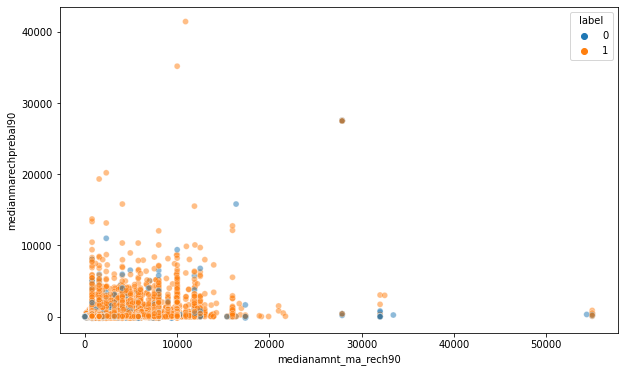

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.medianamnt_ma_rech90,data.medianmarechprebal90,hue=data.label,alpha=0.5)

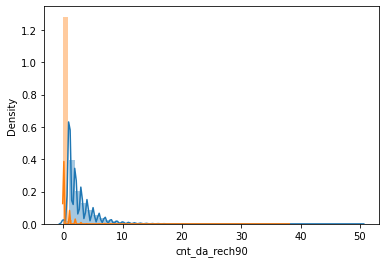

In [ ]:
sns.distplot(data.cnt_loans30)
sns.distplot(data.cnt_da_rech90)

(array([     0.,      0.,      0.,      0.,      0., 209593.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

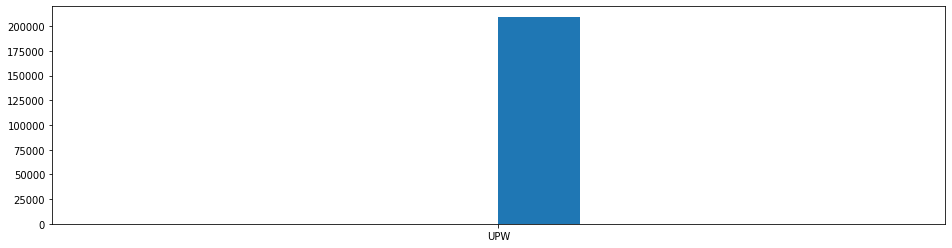

In [ ]:
plt.figure(figsize=(16,4))
plt.hist(data.pcircle)

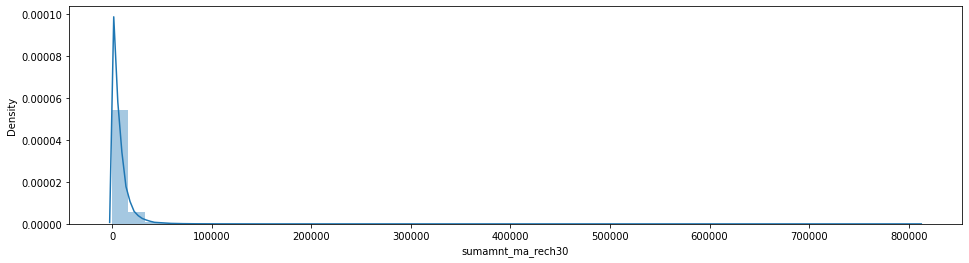

In [ ]:
plt.figure(figsize=(16,4))
sns.distplot(data.sumamnt_ma_rech30)

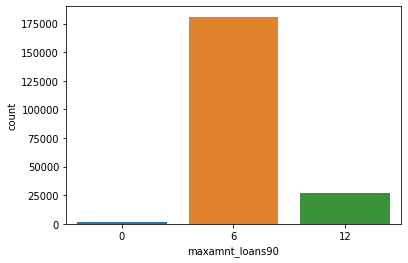

In [ ]:

sns.countplot(data.maxamnt_loans90)

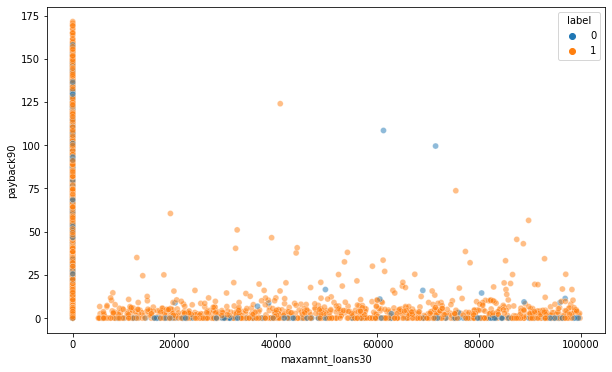

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.maxamnt_loans30,data.payback90,hue=data.label,alpha=0.5)

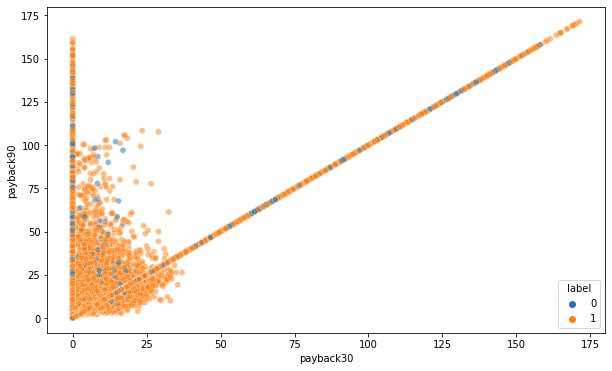

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.payback30,data.payback90,hue=data.label,alpha=0.5)

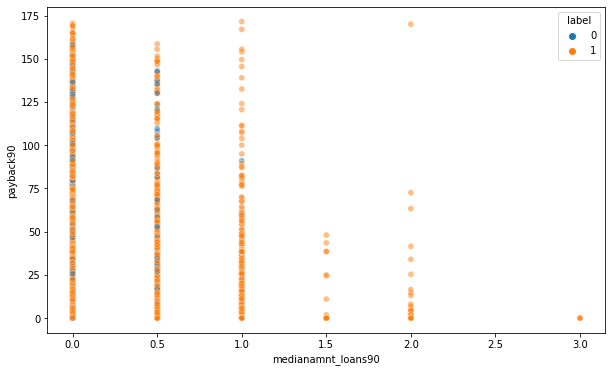

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.medianamnt_loans90,data.payback90,hue=data.label,alpha=0.5)

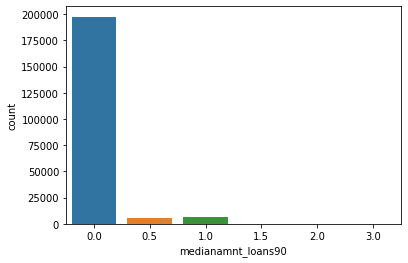

In [ ]:
sns.countplot(data.medianamnt_loans90)

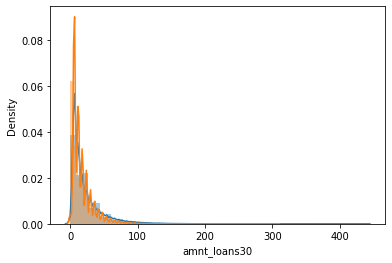

In [ ]:
sns.distplot(data.amnt_loans90)
sns.distplot(data.amnt_loans30)

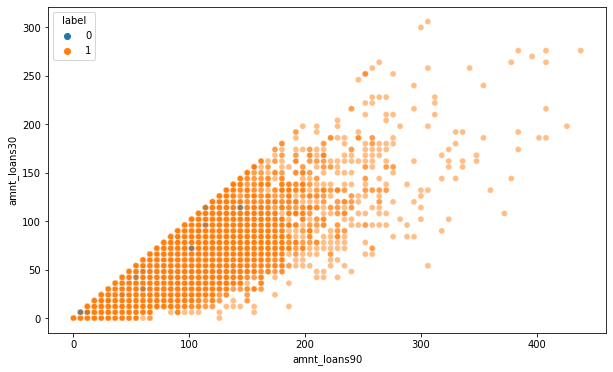

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.amnt_loans90,data.amnt_loans30,hue=data.label,alpha=0.5)


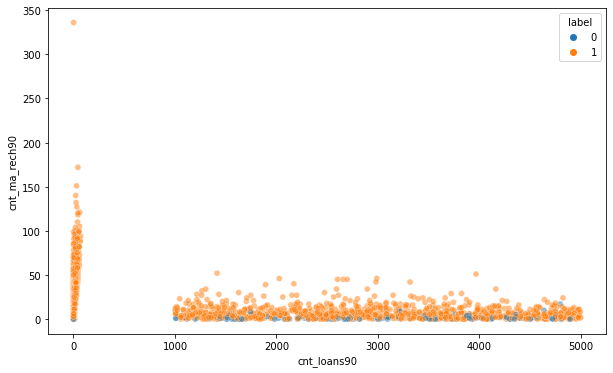

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.cnt_loans90,data.cnt_ma_rech90,hue=data.label,alpha=0.5)

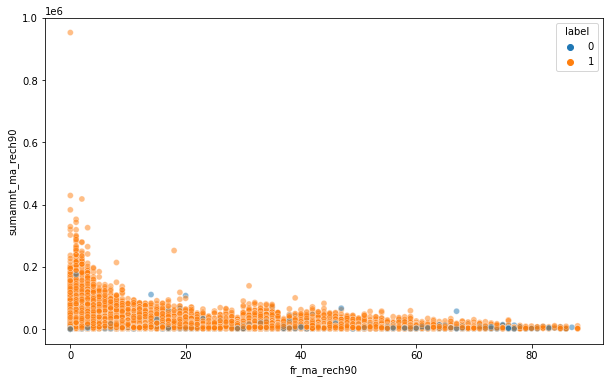

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.fr_ma_rech90,data.sumamnt_ma_rech90,hue=data.label,alpha=0.5)


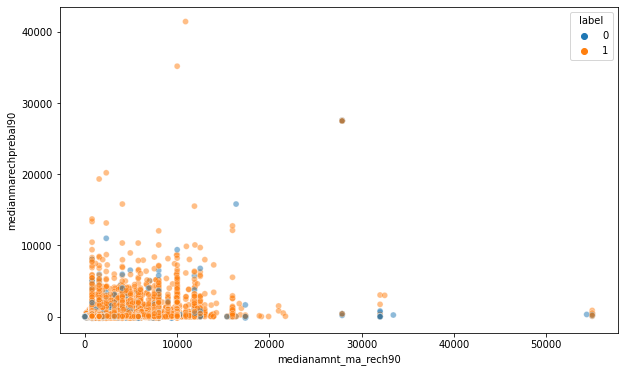

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.medianamnt_ma_rech90,data.medianmarechprebal90,hue=data.label,alpha=0.5)

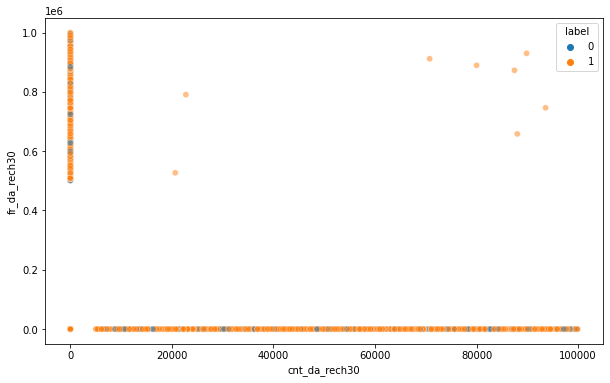

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.cnt_da_rech30,data.fr_da_rech30,hue=data.label,alpha=0.5)

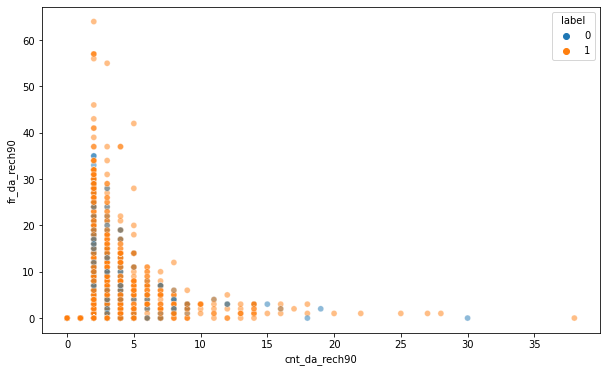

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.cnt_da_rech90,data.fr_da_rech90,hue=data.label,alpha=0.5)

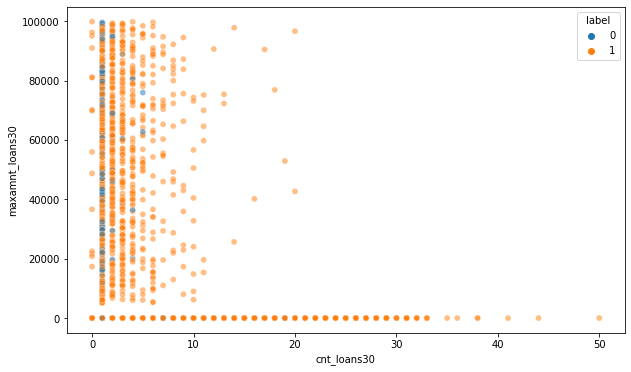

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.cnt_loans30,data.maxamnt_loans30,hue=data.label,alpha=0.5)

In [ ]:
data.drop(columns = 'msisdn',axis = 1, inplace = True)

In [ ]:
data.drop(columns = 'pcircle',axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

data['date'] = lab_enc.fit_transform(data['date'])
data['month'] = lab_enc.fit_transform(data['month'])
data['year'] = lab_enc.fit_transform(data['year'])


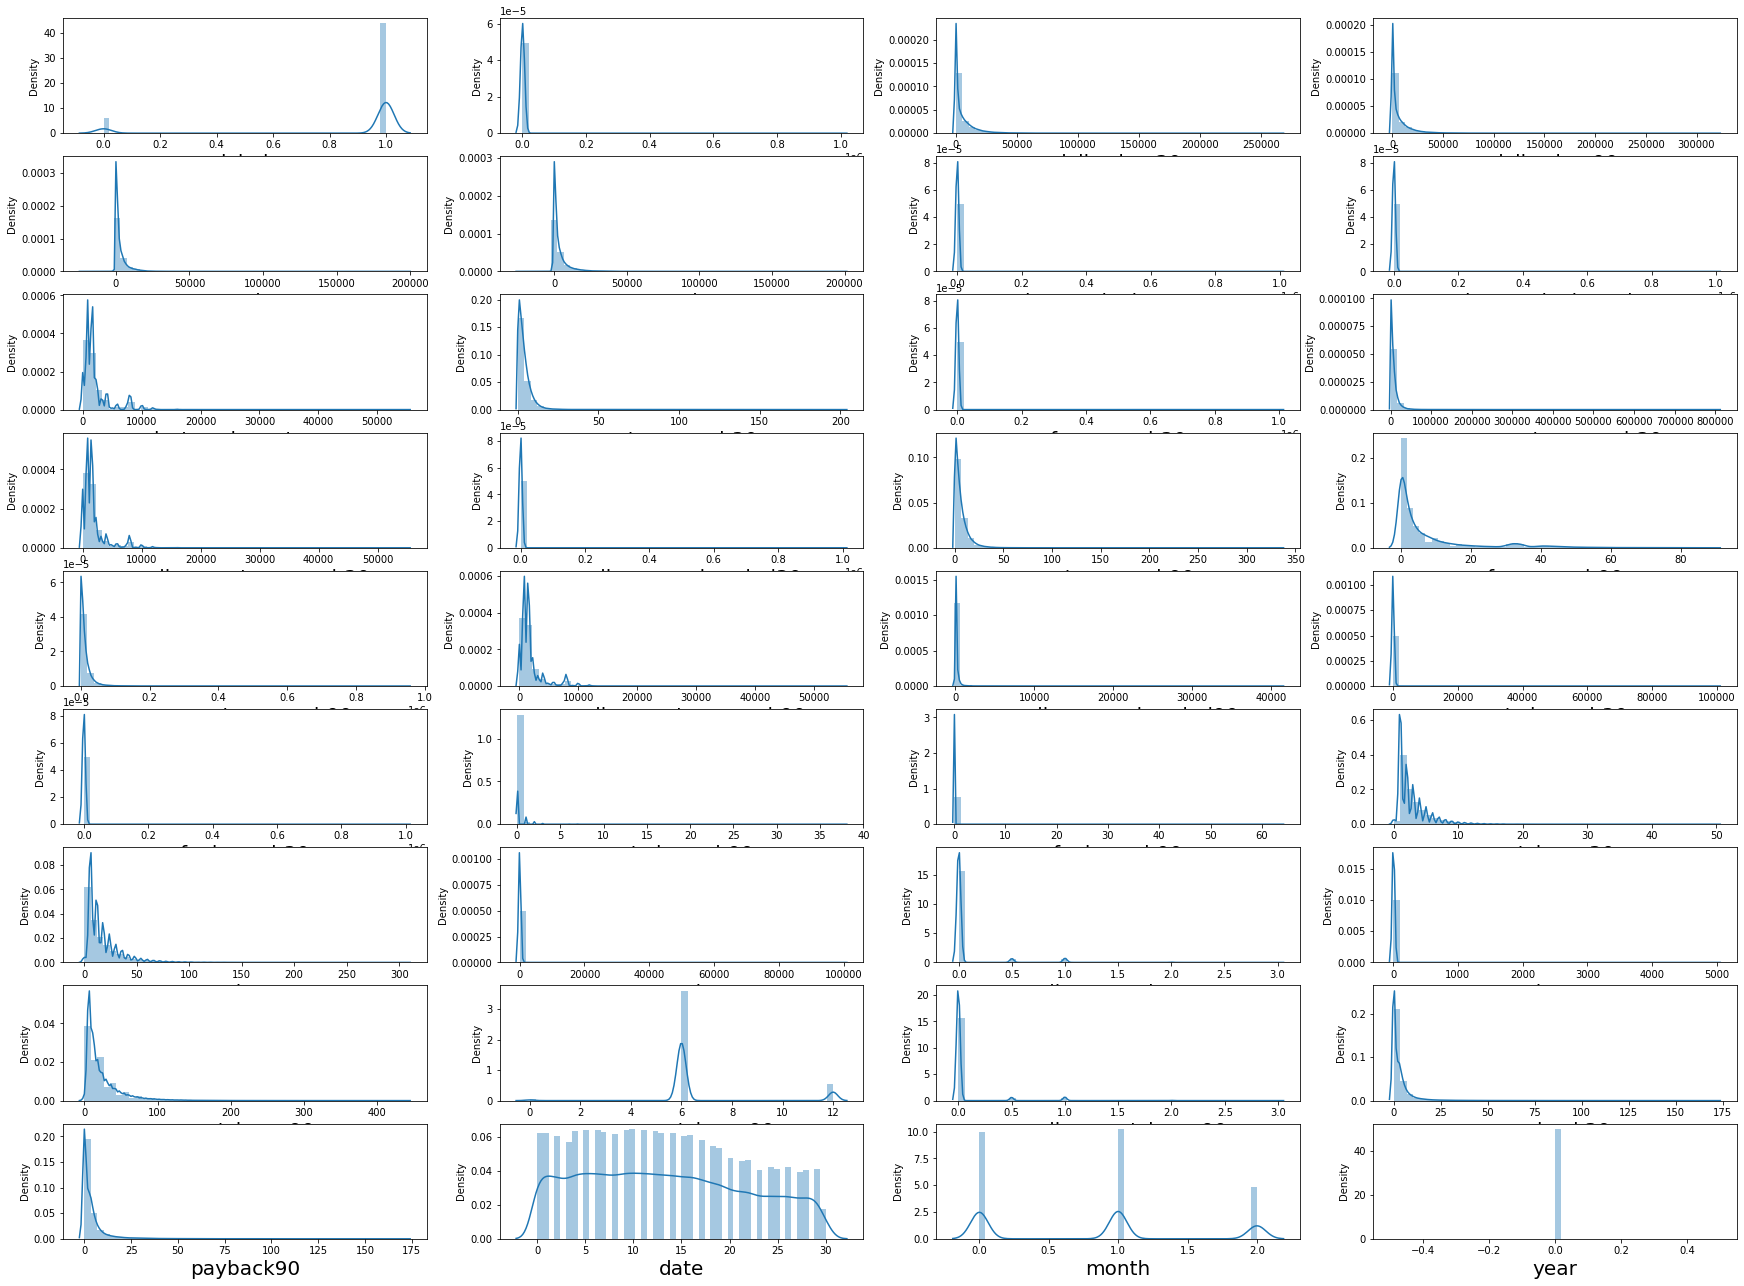

In [ ]:
plt.figure(figsize = (30,25))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(10,4,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

In [ ]:
zero_features = data[['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90']].copy()

In [ ]:
data.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90'],1,inplace=True)

In [ ]:
data[data < 0] = 0

In [ ]:
data.year.value_counts()


0    209593
Name: year, dtype: int64

In [ ]:
#Year has only one value, so deleting it

data.drop(columns = 'year',axis = 1, inplace = True)

In [ ]:
#Spliting the data

Y = data['label']
X = data.drop(columns = ['label'])

In [ ]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

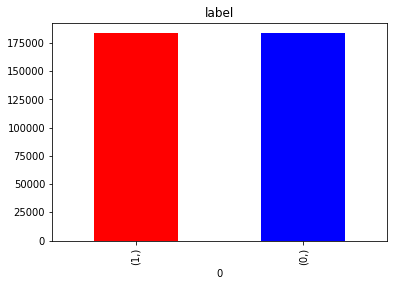

In [ ]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='label', color=['r','b'])

In [ ]:
y = pd.Series(Y_over)
y

0         0
1         1
2         1
3         1
4         1
         ..
366857    0
366858    0
366859    0
366860    0
366861    0
Length: 366862, dtype: int64

In [ ]:
x = pd.DataFrame(X_over)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,272.000000,3055.050000,3065.150000,220.130000,260.130000,2.000000,1539.000000,2.000000,21.000000,3078.000000,1539.000000,7.500000,2.000000,21.000000,3078.000000,1539.000000,7.500000,2.0,12.0,6.0,0.0,2.000000,12.000000,6.0,0.0,29.000000,29.000000,19.000000,1.000000
1,712.000000,12122.000000,12124.750000,3691.260000,3691.260000,20.000000,5787.000000,1.000000,0.000000,5787.000000,5787.000000,61.040000,1.000000,0.000000,5787.000000,5787.000000,61.040000,1.0,12.0,12.0,0.0,1.000000,12.000000,12.0,0.0,0.000000,0.000000,9.000000,2.000000
2,535.000000,1398.000000,1398.000000,900.130000,900.130000,3.000000,1539.000000,1.000000,0.000000,1539.000000,1539.000000,66.320000,1.000000,0.000000,1539.000000,1539.000000,66.320000,1.0,6.0,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000,18.000000,2.000000
3,241.000000,21.228000,21.228000,159.420000,159.420000,41.000000,947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,947.000000,947.000000,2.500000,2.0,12.0,6.0,0.0,2.000000,12.000000,6.0,0.0,0.000000,0.000000,5.000000,0.000000
4,947.000000,150.619333,150.619333,1098.900000,1098.900000,4.000000,2309.000000,7.000000,2.000000,20029.000000,2309.000000,29.000000,8.000000,2.000000,23496.000000,2888.000000,35.000000,7.0,42.0,6.0,0.0,7.000000,42.000000,6.0,0.0,2.333333,2.333333,21.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,247.702325,0.139750,0.139750,678.934755,678.934755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,6.0,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000,3.598927,0.000000
366858,128.979667,5.574934,5.574934,12.221490,12.221490,15.120245,773.000000,2.000000,1.580018,1546.000000,773.000000,44.240053,2.000000,1.580018,1546.000000,773.000000,44.240053,1.0,6.0,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000,16.900088,0.000000
366859,326.697558,952.121209,953.155204,2171.551063,3090.669038,18.919915,2250.032798,1.295004,1.770021,3957.218328,2250.032798,509521.517572,1.295004,1.770021,3957.218328,2250.032798,6.881937,1.0,6.0,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000,18.934975,0.704996
366860,664.042088,10.939205,10.939205,780.434135,780.434135,3.125487,483.200310,1.250195,948176.071486,1445.225247,722.612624,7.188620,1.250195,3.125487,1445.225247,722.612624,7.188620,1.0,6.0,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000,24.749805,0.000000


In [ ]:
#Treating the outliers

# findingout the quantile of data

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
df = x[~((x < (Q1 -  1.5*IQR)) |(x > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", x.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (x.shape[0]-df.shape[0])/x.shape[0])

shape before and after
shape before         : (366862, 29)
shape after          : (131803, 29)
Percentage Loss      : 0.6407286663650091


In [ ]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(x))

data1 = x[(z<3).all(axis = 1)]

In [ ]:
print("shape before and after")
print("shape before".ljust(20),":", x.shape)
print("shape after".ljust(20),":", data1.shape)
print("Percentage Loss".ljust(20),":", (x.shape[0]-data1.shape[0])/x.shape[0])

shape before and after
shape before         : (366862, 29)
shape after          : (270548, 29)
Percentage Loss      : 0.26253468606724056


In [ ]:
#applying standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)


import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,0,1.000256
1,1,32.649123
2,2,35.510564
3,3,16.945729
4,4,18.160112
5,5,1.000266
6,6,4.188219
7,7,17.175141
8,8,1.000160
9,9,14.630570


In [ ]:
x.drop(columns = 17,axis = 1, inplace = True)

In [ ]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,0,1.000256
1,1,32.649028
2,2,35.342906
3,3,16.922803
4,4,18.125890
5,5,1.000266
6,6,4.188166
7,7,16.650755
8,8,1.000158
9,9,14.615191


In [ ]:
df = np.cbrt(x)

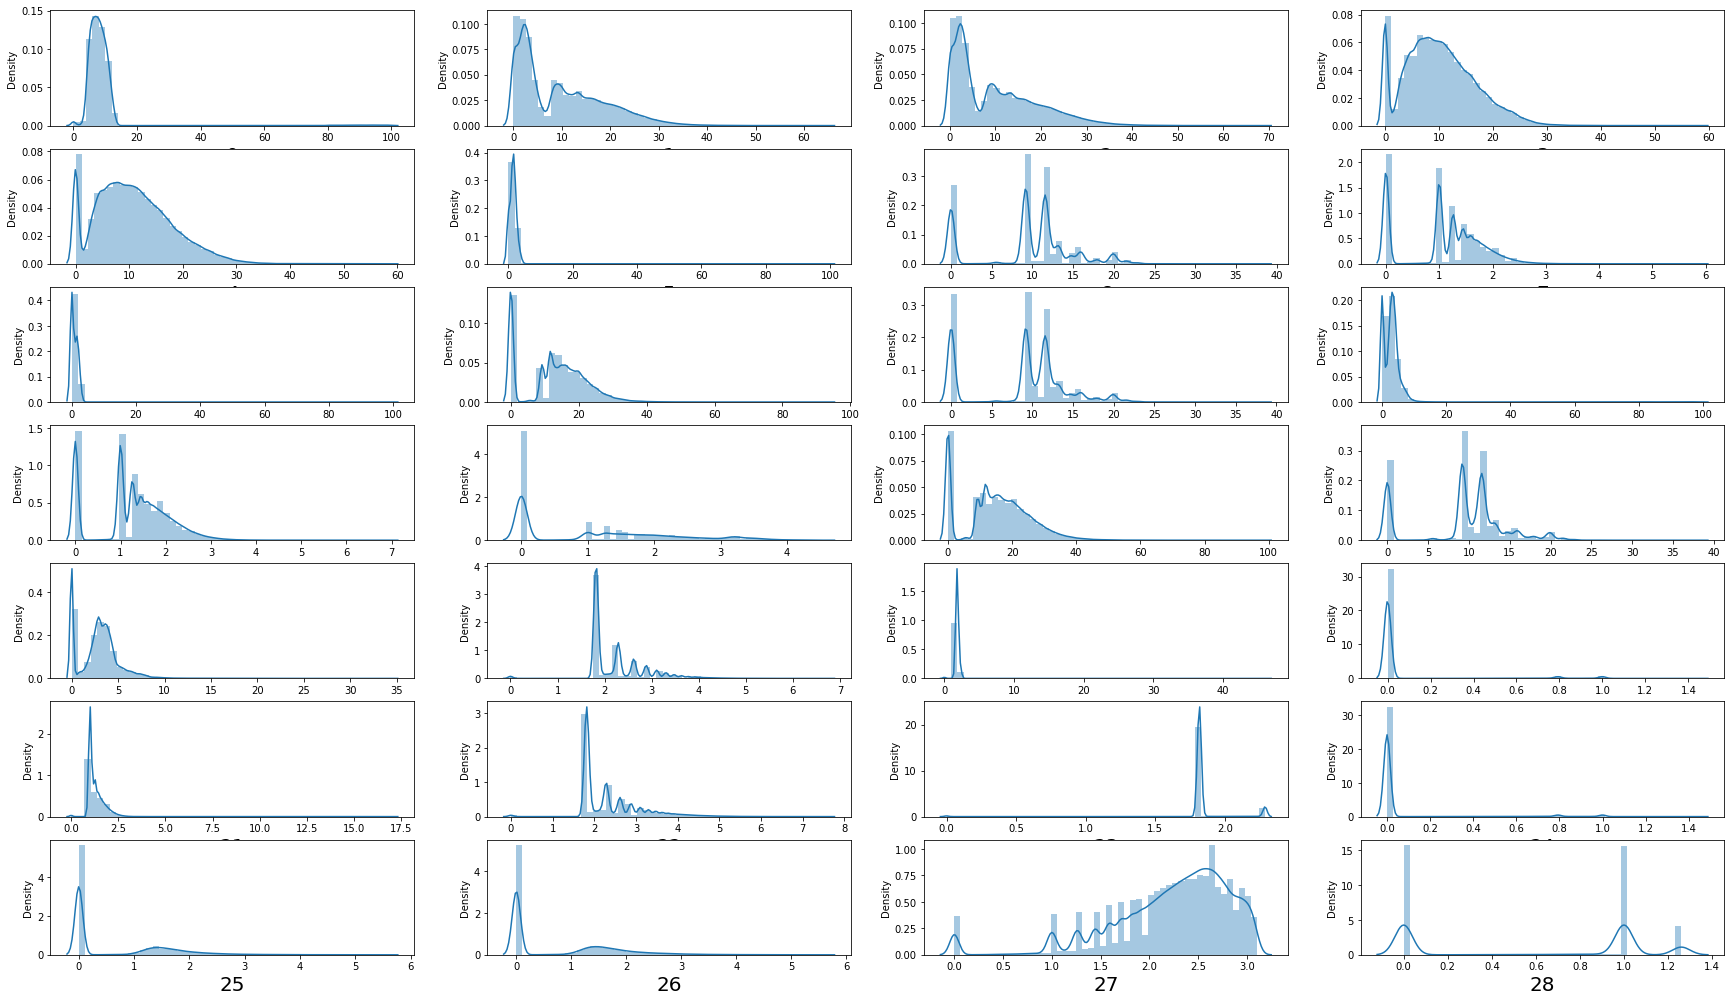

In [ ]:
plt.figure(figsize = (30,25))
graph = 1

for column in df:
  if graph<=40:
    ax = plt.subplot(10,4,graph)
    sns.distplot(df[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

In [ ]:
compare = pd.DataFrame()
compare['skewness before transformation'] = x.skew()
compare['skewness after transformation'] = df.skew()
compare

,skewness before transformation,skewness after transformation
0,10.179221,8.699584
1,4.858888,0.846982
2,5.287298,0.926858
3,4.472279,0.490685
4,4.563820,0.550906
5,15.120708,13.872776
6,5.137543,-0.330421
7,3.592801,-0.214028
8,14.740373,13.674215
9,6.797800,0.087414


In [ ]:
from sklearn.decomposition import PCA
cov_matrix = PCA(n_components = len(df.columns))
cov_matrix.fit(df)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

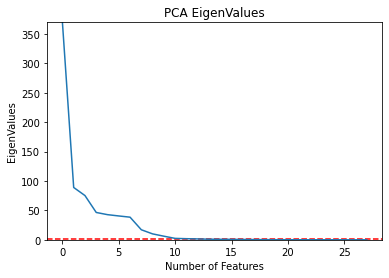

In [ ]:
# Let's plot the PCA components
plt.ylabel('EigenValues')
plt.xlabel('Number of Features')
plt.title('PCA EigenValues')
plt.ylim(0,max(cov_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(cov_matrix.explained_variance_)
plt.show()


In [ ]:
#Let's check variance 
variance = cov_matrix.explained_variance_ratio_
var=np.cumsum(np.round(cov_matrix.explained_variance_ratio_, decimals=3)*100)

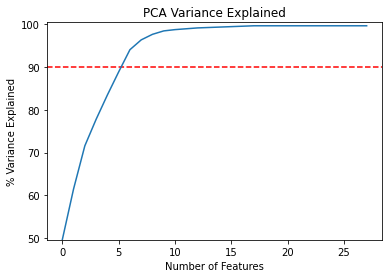

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=90, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [ ]:
pca=PCA(n_components=10)
xp=pca.fit_transform(df)
x1=xp

In [ ]:
x1.shape

(366862, 10)

In [ ]:
y.shape

(366862,)

In [ ]:
#model building

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']
acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df



,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.866087
1,RandomForestClassifier,0.908609
2,DecisionTree,0.841969
3,GradientBoostingClassifier,0.791814


In [ ]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier() 

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

knn = KNeighborsClassifier()
knn.fit(X1_train,y1_train)

y1_pred = knn.predict(X1_test)
conf_mat1 = confusion_matrix(y1_test,y1_pred)
conf_mat1

array([[43585,  2129],
       [10033, 35969]])

In [ ]:
true_positive1 = conf_mat1[0][0]
false_positive1 = conf_mat1[0][1]
false_negative1= conf_mat1[1][0]
false_negative1 = conf_mat1[1][1]

auc1 = roc_auc_score(y1_test,y1_pred)
auc1

0.8676643104231347

In [ ]:

fpr1, tpr1, threshholds1 = roc_curve(y1_test, y1_pred)

print(fpr1)
print(tpr1)
print(threshholds1)

[0.         0.04657217 1.        ]
[0.         0.78190079 1.        ]
[2 1 0]


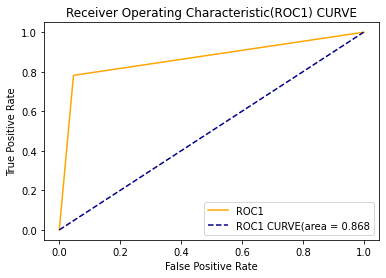

In [ ]:
plt.plot(fpr1, tpr1, color = 'orange', label = 'ROC1')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC1 CURVE(area = %0.3f'%auc1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC1) CURVE')

plt.legend()

plt.show()

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)

y2_pred = rf.predict(X2_test)
conf_mat2 = confusion_matrix(y2_test,y2_pred)
conf_mat2

array([[42064,  3650],
       [ 4688, 41314]])

In [ ]:
true_positive2 = conf_mat2[0][0]
false_positive2 = conf_mat2[0][1]
false_negative2 = conf_mat2[1][0]
false_negative2 = conf_mat2[1][1]

auc2 = roc_auc_score(y2_test,y2_pred)
auc2

0.9091235691522146

In [ ]:
fpr2, tpr2, threshholds2 = roc_curve(y2_test, y2_pred)

print(fpr2)
print(tpr2)
print(threshholds2)

[0.         0.07984425 1.        ]
[0.         0.89809139 1.        ]
[2 1 0]


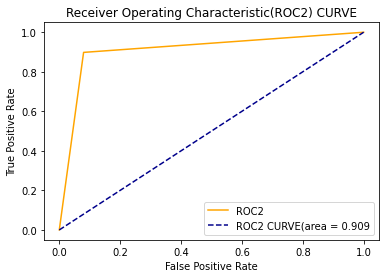

In [ ]:
plt.plot(fpr2, tpr2, color = 'orange', label = 'ROC2')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC2 CURVE(area = %0.3f'%auc2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC2) CURVE')

plt.legend()

plt.show()

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

dtc = DecisionTreeClassifier()
dtc.fit(X3_train,y3_train)

y3_pred = dtc.predict(X3_test)
conf_mat3 = confusion_matrix(y3_test,y3_pred)
conf_mat3

array([[39277,  6437],
       [ 8174, 37828]])

In [ ]:
true_positive3 = conf_mat3[0][0]
false_positive3 = conf_mat3[0][1]
false_negative3 = conf_mat3[1][0]
false_negative3 = conf_mat3[1][1]

auc3 = roc_auc_score(y3_test,y3_pred)
auc3

0.8407509091620097

In [ ]:

fpr3, tpr3, threshholds3 = roc_curve(y3_test, y3_pred)

print(fpr3)
print(tpr3)
print(threshholds3)

[0.         0.14081026 1.        ]
[0.         0.82231207 1.        ]
[2 1 0]


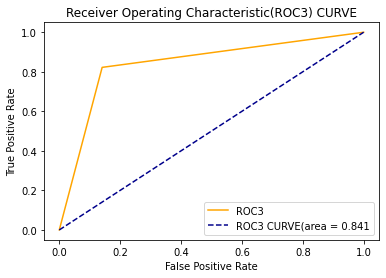

In [ ]:

plt.plot(fpr3, tpr3, color = 'orange', label = 'ROC3')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC3 CURVE(area = %0.3f'%auc3)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC3) CURVE')

plt.legend()

plt.show()

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    x1, y, test_size=0.25, random_state=50)

gb = GradientBoostingClassifier()
gb.fit(X4_train,y4_train)

y4_pred = gb.predict(X4_test)
conf_mat4 = confusion_matrix(y4_test,y4_pred)
conf_mat4

array([[37108,  8606],
       [10433, 35569]])

In [ ]:

true_positive4 = conf_mat4[0][0]
false_positive4 = conf_mat4[0][1]
false_negative4 = conf_mat4[1][0]
false_negative4 = conf_mat4[1][1]

auc4 = roc_auc_score(y4_test,y4_pred)
auc4

0.7924740430974374

In [ ]:
fpr4, tpr4, threshholds4 = roc_curve(y4_test, y4_pred)

print(fpr4)
print(tpr4)
print(threshholds4)

[0.         0.18825743 1.        ]
[0.         0.77320551 1.        ]
[2 1 0]


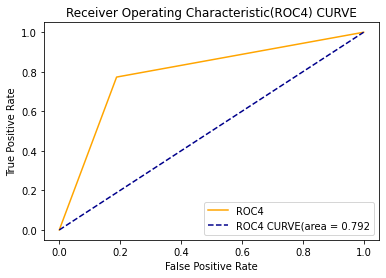

In [ ]:
plt.plot(fpr4, tpr4, color = 'orange', label = 'ROC4')

plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'ROC4 CURVE(area = %0.3f'%auc4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic(ROC4) CURVE')

plt.legend()

plt.show()

In [ ]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8660866152034541
Precision: 0.94480433981145
Recall: 0.7788728725251823
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88     45652
           1       0.94      0.78      0.85     46064

    accuracy                           0.87     91716
   macro avg       0.88      0.87      0.87     91716
weighted avg       0.88      0.87      0.87     91716



In [ ]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.907377120676872
Precision: 0.9171459661122338
Recall: 0.8965786731503994
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     45652
           1       0.92      0.90      0.91     46064

    accuracy                           0.91     91716
   macro avg       0.91      0.91      0.91     91716
weighted avg       0.91      0.91      0.91     91716



In [ ]:
#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8422194600723975
Precision: 0.8561700976302676
Recall: 0.8243313650573115
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84     45652
           1       0.86      0.82      0.84     46064

    accuracy                           0.84     91716
   macro avg       0.84      0.84      0.84     91716
weighted avg       0.84      0.84      0.84     91716



In [ ]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7918138601770683
Precision: 0.8044842846820809
Recall: 0.7734673497742272
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79     45652
           1       0.80      0.77      0.79     46064

    accuracy                           0.79     91716
   macro avg       0.79      0.79      0.79     91716
weighted avg       0.79      0.79      0.79     91716



In [ ]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x1, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.871379
1,RandomForestClassifier,0.911983
2,DecisionTree,0.846572
3,GradientBoostingClassifier,0.790586


In [ ]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.866087,0.871379,-0.005293
1,RandomForestClassifier,0.908609,0.911983,-0.003374
2,DecisionTree,0.841969,0.846572,-0.004603
3,GradientBoostingClassifier,0.791814,0.790586,0.001228


In [100]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'learning_rate' : [0.1,0.2,0.18],
    'subsample' : [0.5,1.0],
    'loss' : ['deviance','exponential']
}

In [101]:
grid = GridSearchCV(gb, param_grid = grid_param)

In [102]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [103]:
best_parameters = grid.best_params_
print(best_parameters)

{'learning_rate': 0.2, 'loss': 'deviance', 'subsample': 0.5}


In [104]:
#FINAL MODEL
#Substituting the best parameters in the GradientBoostingClassifier:

GB = GradientBoostingClassifier(learning_rate =0.2, loss = 'deviance', subsample = 0.5)

GB.fit(X_train, y_train)
GB.score(X_test,y_test)

0.8022482445810982

In [105]:
#SAVING THE MODEL:

import joblib
joblib.dump(GB, 'Micro_credit_final_model.pkl')


['Micro_credit_final_model.pkl']